In [2]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("/data1/sascha/")
#import lob_bench.eval as eval
import lob.validation_helpers as valh
import lob.inference_no_errcorr as inference
import random


/tmp/ipykernel_121584/3418385606.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
sys.path

['/data1/sascha/LOBS5',
 '/data1/sascha/AlphaTrade',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python310.zip',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/lib-dynload',
 '',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/site-packages',
 '/data1/sascha/',
 '/data1/sascha/LOBS5/AlphaTrade']

# Processed input data

In [3]:
rng = random.Random(42)

In [4]:
message_files = sorted(glob("/data1/sascha/data/lobster_preproced/GOOG2019/" + '*message*.npy'))
book_files = sorted(glob("/data1/sascha/data/lobster_preproced/GOOG2019/" + '*orderbook*.npy'))
print(len(message_files))
max(1, int(len(message_files) * 0.1))
test_split=0.1
val_split=0.1



n_test_files = max(1, int(len(message_files) * test_split))
# train on first part of data
train_files = message_files[:len(message_files) - n_test_files]
# and test on last days
test_files = message_files[len(train_files):]


train_book_files = book_files[:len(book_files) - n_test_files]
test_book_files = book_files[len(train_book_files):]
# zip together message and book files to randomly sample together
train_files = list(zip(train_files, train_book_files))


val_files = [
    train_files.pop(
        rng.randrange(0, len(train_files))
    ) for _ in range(int(np.ceil(val_split * len(message_files))))]


241


In [5]:
train_message_files=list((*zip(*train_files),)[0])
train_book_files=list((*zip(*train_files),)[1])

In [7]:
train_message_files

['/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-02_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-03_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-04_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-07_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-08_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-09_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-16_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-17_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-18_34200000_57600000_message_10_proc.npy',
 '/data1/sascha/data/lobster_preproced/GOOG2019/GOOG_2019-01-22_

In [11]:
day=0 #file indx
seq=0 #sequence inx
offset=0 #offset
x=np.load(train_message_files[day])
x[seq*500+offset]

array([ 6771022,        4,        1, 10171300,      -43,        2,
              0,        0,    34200,   222321,    -9999,    -9999,
          -9999,    -9999])

In [12]:
print(np.load(train_book_files[day]))

[[        0     34200    222321 ...        35  10115000         1]
 [      -16     34200    222321 ...        35  10110000        50]
 [        0     34200    385405 ...        10  10110000        50]
 ...
 [        0     57599 941950639 ...       300  10452900       928]
 [       -8     57599 942074218 ...       300  10452500       300]
 [       14     57599 942074218 ...       300  10452900       928]]


In [13]:


m_lob=inference.msg_to_lobster_format(np.load(train_message_files[day]))
b_lob=inference.book_to_lobster_format(np.load(book_files[day])).drop(columns=[0,1,2]).rename(columns=lambda x:x-1)
b_lob_dropped=b_lob[1:].reset_index().drop(columns='index')
ask_depths, bid_depths=eval.limit_order_levels(m_lob,b_lob_dropped)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 m_lob=inference.msg_to_lobster_format(np.load(train_message_files[day]))                     │
│   2 b_lob=inference.book_to_lobster_format(np.load(book_files[day])).drop(columns=[0,1,2]).r     │
│   3 b_lob_dropped=b_lob[1:].reset_index().drop(columns='index')                                  │
│ ❱ 4 ask_depths, bid_depths=eval.limit_order_levels(m_lob,b_lob_dropped)                          │
│   5                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'builtin_function_or_method' object has no attribute 'limit_order_levels'

In [14]:
plt.hist(bid_depths)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 plt.hist(bid_depths)                                                                         │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'bid_depths' is not defined

In [8]:
m_lob

NameError: name 'm_lob' is not defined

In [9]:
b_lob_dropped.reset_index().drop(columns='index')

NameError: name 'b_lob_dropped' is not defined

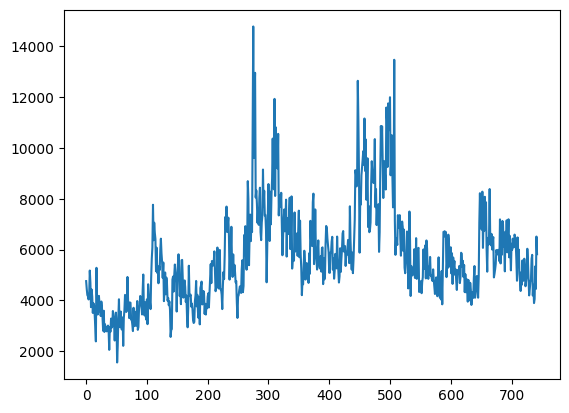

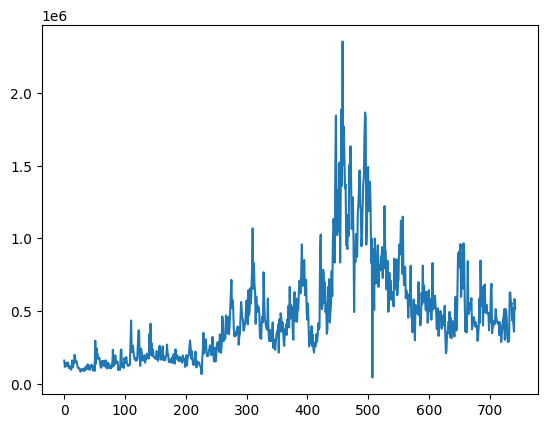

In [12]:
spreads,n_msg,mid=[],[],[]

for bookfile,msgfile in zip(book_files,msg_files):
    b=np.load(bookfile)
    m=np.load(msgfile)
    b=b[1:]
    spread=(b[:,1]-b[:,3]).mean()
    spreads.append(spread)

    pricerange=m[:,3].max()-m[:,3].min()
    if spread > 1e6:
        print(b[:,1]-b[:,3])
        print(b[:,1],b[:,3])
        break
    n_msg.append(b.shape[0])
    mid.append(((b[:,1]+b[:,3])/2).mean())

plt.plot(spreads)
plt.figure()
plt.plot(n_msg)

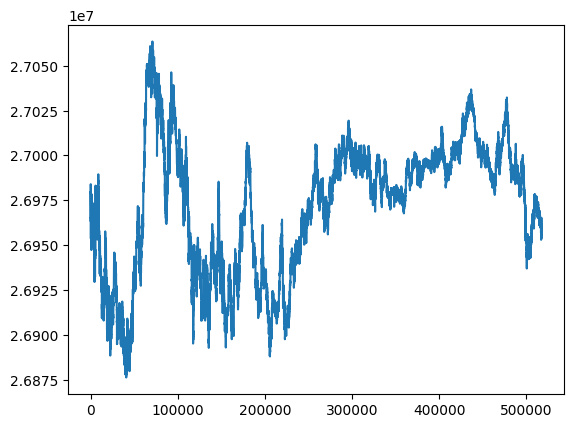

In [15]:
plt.plot((b[:,1]+b[:,3]))

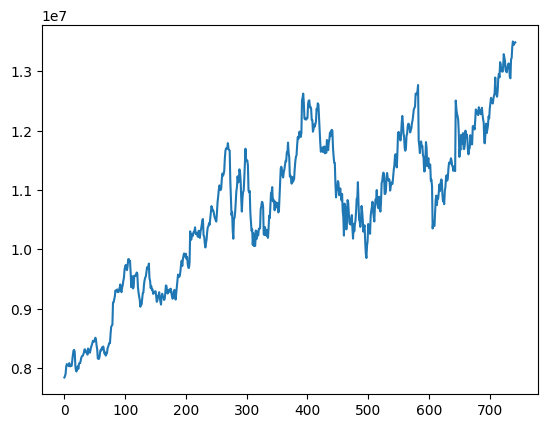

In [13]:
plt.plot(mid)

In [23]:
x=np.load(msg_files[0])
x[:,3].max()

7904000

# CSV Files - Gen or Raw

In [66]:
msg_files_gen = sorted(glob("/data1/sascha/data/generated_data/overfit/data_gen/" + '*message*.csv'))
book_files_gen = sorted(glob("/data1/sascha/data/generated_data/overfit/data_gen/" + '*orderbook*.csv'))
msg_files_real = sorted(glob("/data1/sascha/data/generated_data/overfit/data_real/" + '*message*.csv'))
book_files_real = sorted(glob("/data1/sascha/data/generated_data/overfit/data_real/" + '*orderbook*.csv'))
print(len(msg_files_real))
max(1, int(len(msg_files_real) * 0.1))

1


1

In [67]:
import preproc

In [68]:
errors=[]
i=0
for bfg,mfg,bfr,mfr, in zip(book_files_gen,msg_files_gen,book_files_real,msg_files_real):
    bg=pd.read_csv(bfg,header=None)
    mg=pd.read_csv(mfg,names=("time","event_type","order_id","quantity","price","side"))
    br=pd.read_csv(bfr,header=None)
    mr=pd.read_csv(mfr,names=("time","event_type","order_id","quantity","price","side"))
    # err=(bg.diff(1)==0).all(axis=1).sum()
    # diff_m=mr-mg
    # diff_b=br-bg
    # print(diff_m[400:450])
    # print(diff_b.iloc[0:50,:40])
    # print(diff_m.sum())
    # print(diff_b.iloc[100:150].sum())
    # print(bg.iloc[34:38,20:])
    # print(br.iloc[34:38,20:])
    # print(mg.iloc[34:38])
    # print(mr.iloc[34:38])

    # preprocedbook_gen=preproc.augment_book_state(bg,mg)
    # transformed_gen=preproc.transform_L2_state(preprocedbook_gen,500,100)
    # preprocedbook_real=preproc.augment_book_state(br,mr)
    # transformed_real=preproc.transform_L2_state(preprocedbook_real,500,100)

    # print((transformed_gen-transformed_real).sum(axis=1))
    # print(transformed_gen[-45]-transformed_real[-45])
    # print(transformed_gen[-45][19])
    # print(transformed_real[-45][19])
    # print(br.iloc[-45])
    # print(bg.iloc[-45,:50])

    




time          0.000000e+00
event_type    0.000000e+00
order_id      3.404715e+09
quantity      0.000000e+00
price         0.000000e+00
side          0.000000e+00
dtype: float64


In [26]:
print(np.mean(errors))

6.0


In [27]:
def reason_for_err(series):
    if ~((series.iloc[int(series['side']+1):80:4]==series['price']).any()) and series['event_type']==3:
        return "Price not there"

In [28]:
err=(bg.diff(1)==0).all(axis=1)
conc=pd.concat([bg.shift(-1),mg],axis=1)
error_df=conc[err]
# error_df['err_reason']=error_df.apply(reason_for_err,axis=1)
error_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,time,event_type,order_id,quantity,price,side
197,892900.0,56.0,892800.0,48.0,893000.0,21.0,892700.0,284.0,893200.0,1084.0,...,893900.0,450.0,891900.0,150.0,43107.240459,3,-2,93,893100,-1
242,892800.0,297.0,892600.0,209.0,892900.0,256.0,892500.0,541.0,893000.0,21.0,...,893800.0,900.0,891700.0,150.0,43107.247261,3,-2,95,892700,1
265,892800.0,240.0,892600.0,251.0,892900.0,134.0,892500.0,541.0,893000.0,343.0,...,893800.0,900.0,891700.0,150.0,43107.783231,3,-2,100,892700,1
344,892500.0,100.0,892400.0,1036.0,892600.0,100.0,892300.0,475.0,892700.0,350.0,...,893500.0,1150.0,891500.0,500.0,43107.792393,3,198,50,893400,-1
348,892500.0,100.0,892400.0,836.0,892600.0,100.0,892300.0,475.0,892700.0,350.0,...,893500.0,1150.0,891500.0,500.0,43107.792585,3,-2,100,893100,-1
377,892700.0,250.0,892400.0,886.0,892800.0,104.0,892300.0,425.0,892900.0,334.0,...,893700.0,200.0,891500.0,650.0,43107.795128,3,-2,100,892600,-1
424,892500.0,300.0,892400.0,536.0,892700.0,250.0,892300.0,425.0,892800.0,303.0,...,893600.0,1397.0,891500.0,801.0,43107.807695,3,-2,56,892600,-1
428,892500.0,300.0,892400.0,536.0,892600.0,100.0,892300.0,425.0,892700.0,250.0,...,893500.0,1200.0,891500.0,801.0,43107.815367,3,-2,100,893100,-1
468,892500.0,500.0,892400.0,536.0,892600.0,100.0,892300.0,303.0,892700.0,150.0,...,893400.0,684.0,891500.0,801.0,43107.870945,3,268,100,893400,-1


In [17]:
error_df[~(error_df.loc[:,'err_reason']=='Price not there')]

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,time,event_type,order_id,quantity,price,side,err_reason
7,9147100.0,4.0,9146400.0,298.0,9149300.0,5.0,9143400.0,65.0,9149700.0,460.0,...,2.0,-1.0,0.0,57045.954978,3,-2,2,9152400,-1,None
37,9147100.0,3.0,9146400.0,298.0,9147300.0,5.0,9143400.0,65.0,9149200.0,100.0,...,105.0,-1.0,0.0,57062.179013,3,-2,25,9141300,1,None
56,9149200.0,100.0,9147600.0,1.0,9149300.0,5.0,9146400.0,298.0,9149700.0,460.0,...,25.0,-1.0,0.0,57063.633100,1,944,25,9155600,-1,None
72,9149200.0,100.0,9147600.0,1.0,9149300.0,5.0,9147300.0,5.0,9149700.0,460.0,...,105.0,9139200.0,25.0,57064.878874,1,928,9,9155600,-1,None
82,9149200.0,80.0,9148300.0,50.0,9149300.0,5.0,9147600.0,1.0,9149700.0,460.0,...,105.0,9140000.0,41.0,57064.882390,1,918,2,9157200,-1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57221.416490,1,35,31,9143900,1,None
967,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57221.677312,1,33,31,9143900,1,None
968,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57222.498590,1,32,69,9155900,-1,None
969,9150000.0,417.0,9149900.0,2.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57223.320424,1,31,31,9143900,1,None


In [ ]:
m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].loc[b_m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].apply(in_book,axis=1)]

In [ ]:
b.loc[(err_idx) & (m.loc[:,"event_type"]==3)].loc[b_m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].apply(in_book,axis=1)]

In [ ]:
plt.plot(b.loc[:,0])
plt.plot(b.loc[:,2])
# plt.plot((real_book.loc[:,0]+real_book.loc[:,2])/2)

In [ ]:
gen_msg.loc[((gen_book.diff(1)==0).all(axis=1)) & (gen_msg.loc[:,1]==3)]

In [ ]:
gen_book.loc[((gen_book.diff(1)==0).all(axis=1)) & (gen_msg.loc[:,1]==3)].loc[:,8:]